In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display

In [2]:
#Import dataset
df=pd.read_csv('insurance.csv')

In [3]:
#Exploratory Data Analysis
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


In [4]:
df.tail(3)

,age,sex,bmi,children,smoker,region,expenses
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.sample(3)

,age,sex,bmi,children,smoker,region,expenses
827,36,male,28.0,1,yes,northeast,20773.63
703,34,female,26.4,1,no,northwest,5385.34
1062,59,male,41.1,1,yes,southeast,48970.25


In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
#Finding out if datset has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<b>Numerical features

In [10]:
[features for features in df.dtypes[df.dtypes !='object'].index]

['age', 'bmi', 'children', 'expenses']

In [11]:
num_features =df.dtypes[df.dtypes!='object'].index
num_features

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [12]:
len(num_features)

4

In [13]:
df[num_features].describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<b>Distribution of Categorical features

In [14]:
cat_features = df.dtypes[ df.dtypes == 'object'].index
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
len(cat_features)

3

In [16]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<b>Check the Unique labels in the categorical features

In [17]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<b>Data Cleaning

In [23]:
#Check the shape before drop duplicates
df.shape

(1338, 7)

In [24]:
df=df.drop_duplicates()

In [25]:
df.shape

(1337, 7)

In [26]:
#Check the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<b>Data visualization

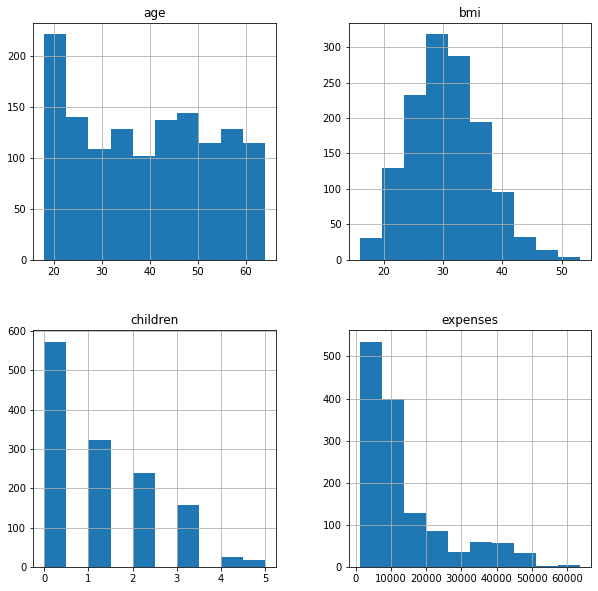

In [27]:
#Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

Here BMI looks like normal distribution, children & expenses is right skewed

<b>Scatter Plot

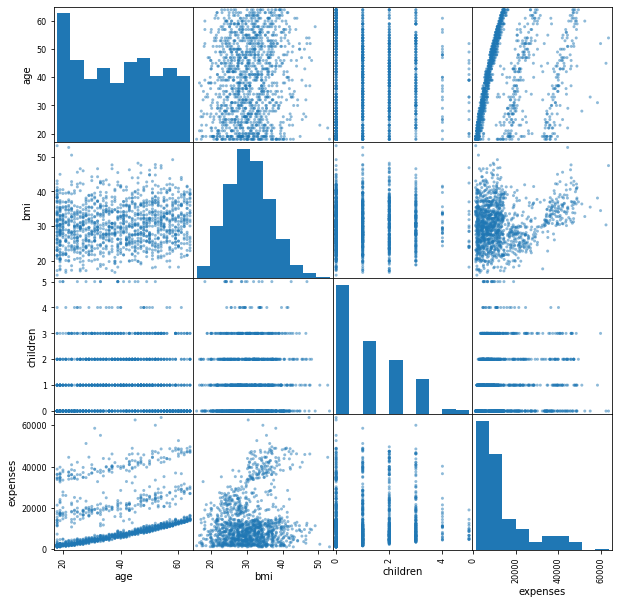

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10));

In [29]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[num_features])) < 3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


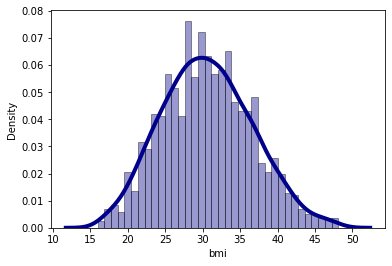

In [30]:
sns.distplot(df['bmi'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

Text(0.5, 1.0, 'Premium for Smokers')

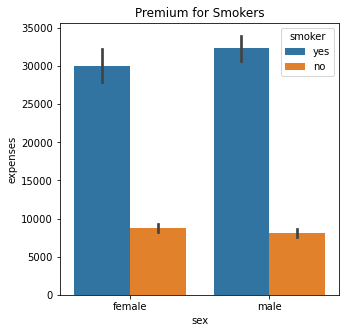

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='expenses',hue= 'smoker',data= df)
plt.title('Premium for Smokers')

<b> Feature Engineering

In [32]:
df1=df.copy()
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [33]:
# # df = pd.get_dummies(df,columns=['children','sex','smoker','region'])
# df1 = pd.get_dummies(df,columns=['sex','smoker','region'])
# df1.dtypes

In [34]:
df1['sex']=df1['sex'].apply({'male':1,'female':0}.get)
df1['smoker']=df1['smoker'].apply({'yes':1,'no':0}.get)
df1['region']=df1['region'].apply({'northeast':1 ,'northwest':2,'southeast':3,'southwest':4}.get)

In [35]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,4,16884.92
1,18,1,33.8,1,0,3,1725.55
2,28,1,33.0,3,0,3,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [36]:
corr1= df1.corr()
corr1

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.018180,0.118328,0.058142,-0.029671,0.002619,0.304541
sex,-0.018180,1.000000,0.042528,0.014774,0.079479,0.003434,0.060242
bmi,0.118328,0.042528,1.000000,0.029855,-0.005072,0.160000,0.191762
children,0.058142,0.014774,0.029855,1.000000,0.028498,-0.003303,0.099814
smoker,-0.029671,0.079479,-0.005072,0.028498,1.000000,-0.003651,0.785115
region,0.002619,0.003434,0.160000,-0.003303,-0.003651,1.000000,-0.007978
expenses,0.304541,0.060242,0.191762,0.099814,0.785115,-0.007978,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'sex'),
  Text(2.5, 0, 'bmi'),
  Text(3.5, 0, 'children'),
  Text(4.5, 0, 'smoker'),
  Text(5.5, 0, 'region'),
  Text(6.5, 0, 'expenses')])

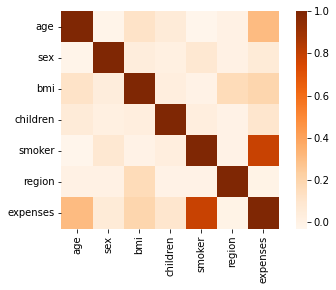

In [38]:
sns.heatmap(data=corr1 ,square=True  ,cmap='Oranges')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [39]:
X=df1.drop('expenses',axis=1)
y=df1['expenses']

In [40]:
# X=df.drop('expenses',axis=1)
# y=df['expenses']

In [41]:
X.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,4
1,18,1,33.8,1,0,3
2,28,1,33.0,3,0,3


In [42]:
y.head(3)

0    16884.92
1     1725.55
2     4449.46
Name: expenses, dtype: float64

In [43]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [44]:
xtrain,xtest,ytrain,ytest =model_selection.train_test_split(X,y,test_size=0.3 ,random_state=42)

In [45]:
# xtrain_num=xtrain.get_dummies(xtrain,columns=['sex','smoker','age'])
# xtest_num=xtest.get_dummies(xtest,columns=['sex','smoker','age'])
# #     df['sex']=pd.get_dummies(df,columns=['sex'])
# #     df['smoker']=pd.get_dummies(df,columns=['smoker'])
# #     df['smoker']=pd.get_dummies(df,columns=['region'])

In [46]:
lin=LinearRegression()
lin.fit(xtrain,ytrain)

LinearRegression()

In [47]:
print(lin.coef_)
print(lin.intercept_)

[  254.72883534  -248.72987613   292.55767157   551.4623863
 23012.33062711  -331.19078057]
-10025.162614006274


In [48]:
ypred =lin.predict(xtest)
ypred[:5]

array([23311.61209861, 12620.67426238,  8117.636643  ,  5236.16539001,
       32652.77716758])

In [49]:
ytest[:5]

1033    13747.87
1069    10928.85
708      6113.23
749      3062.51
736     40419.02
Name: expenses, dtype: float64

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2score =r2_score(ytest,ypred)
r2score

0.7839625074788701

In [52]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=42)
model_dt.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
pred_dt[:5]

array([12829.46, 11512.41,  5425.02,  2867.12, 37270.15])

In [53]:
ytest[:5]

1033    13747.87
1069    10928.85
708      6113.23
749      3062.51
736     40419.02
Name: expenses, dtype: float64

In [54]:
r2score =r2_score(ytest,pred_dt)
r2score

0.6787724351220716

In [55]:
from sklearn.ensemble import RandomForestRegressor

model_rfc= RandomForestRegressor(random_state=42)
model_rfc.fit(xtrain,ytrain)
pred_rfc=model_rfc.predict(xtest)
pred_rfc[:5]

array([14395.2539, 13429.4258,  6477.5037,  6836.6673, 41630.7426])

In [56]:
r2score =r2_score(ytest,pred_rfc)
r2score

0.8696306762712263

In [57]:
# # xtest1 =[30 ,35.3,0,0,1,0,1,0,0,0,1]
# # xtest1 =[30 ,29.6,1,1,0,1,0,0,0,1,0]
# xtest1 =[35 ,27.6,1,0,1,1,0,0,0,1,0]
# inputdata =np.asarray(xtest1)

# input_reshape =inputdata.reshape(1,-1)

In [58]:
# pred_rfc=model_rfc.predict(input_reshape)
# pred_rfc

<h1> Interactive Widgets

In [59]:
xtrain.describe()

,age,sex,bmi,children,smoker,region
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,39.106011,0.514754,30.361202,1.021858,0.197814,2.481967
std,14.079903,0.500056,6.010370,1.117575,0.398569,1.099260
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.000000
25%,26.000000,0.000000,25.900000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,30.100000,1.000000,0.000000,3.000000
75%,51.000000,1.000000,34.400000,2.000000,0.000000,3.000000
max,64.000000,1.000000,48.100000,4.000000,1.000000,4.000000


In [60]:
{column: list(df[column].unique())  for column in df.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [61]:
xtrain.head()

,age,sex,bmi,children,smoker,region
1239,25,0,42.1,1,0,3
1234,45,0,27.8,2,0,3
542,63,0,36.3,0,0,3
743,31,0,26.6,0,0,3
921,62,0,33.2,0,0,4


In [62]:
age_widget = widgets.IntSlider(
    value=39,
    min=18,
    max=64,
    step =1,
    description='Age:'
)

In [63]:
children_widget = widgets.IntSlider(
    value=1,
    min=0,
    max=4,
    step =1,
    description='Children :'
)

In [64]:
bmi_widget = widgets.FloatSlider(
    value=30,
    min=16,
    max=48,
    step =0.01,
    description='BMI :'
)

In [65]:
sex_widget = widgets.ToggleButtons(
    options=['female','male'],
    description='Sex :'
)

In [66]:
smoker_widget = widgets.ToggleButtons(
    options=['no','yes'],
    description='Smoker :'
)

In [67]:
region_widget = widgets.Dropdown(
    options = ['southwest', 'southeast', 'northwest', 'northeast'],
    description = 'Region'
)

In [95]:
age_widget = widgets.IntSlider(
    value=39,
    min=18,
    max=64,
    step =1,
    description='Age:'
)

children_widget = widgets.IntSlider(
    value=1,
    min=0,
    max=4,
    step =1,
    description='Children :'
)

bmi_widget = widgets.FloatSlider(
    value=30,
    min=16,
    max=48,
    step =0.01,
    description='BMI :'
)

sex_widget = widgets.ToggleButtons(
    options=['female','male'],
    description='Sex :'
)

smoker_widget = widgets.ToggleButtons(
    options=['no','yes'],
    description='Smoker :'
)

region_widget = widgets.Dropdown(
    options = ['southwest', 'southeast', 'northwest', 'northeast'],
    description = 'Region'
)

In [122]:
predict_btn = widgets.Button(
description='Predict'
)

prediction_out =widgets.Output()


def make_prediction(btn):
    
    X_inp=pd.DataFrame({
        'age':     age_widget.value,
        'bmi':     bmi_widget.value,
        'children':children_widget.value,
          'sex':   sex_widget.value,
        'smoker':  smoker_widget.value,
        'region':  region_widget.value,  
        
    },index=[0])
       
    X_inp['sex']=X_inp['sex'].apply({'male':1,'female':0}.get)
    X_inp['smoker']=X_inp['smoker'].apply({'yes':1,'no':0}.get)
    X_inp['region']=X_inp['region'].apply({'northeast':1 ,'northwest':2,'southeast':3,'southwest':4}.get)
    
    
    prediction=model_rfc.predict(X_inp)
    
    with prediction_out:
        prediction_out.clear_output()
        print("The Expected Insurance Premium is:{:.2f} ".format(prediction[0]))
        
predict_btn.on_click(make_prediction)

display(age_widget,children_widget,bmi_widget,sex_widget,smoker_widget,region_widget)
display(predict_btn)
display(prediction_out)

IntSlider(value=39, description='Age:', max=64, min=18)

IntSlider(value=1, description='Children :', max=4)

FloatSlider(value=35.09, description='BMI :', max=48.0, min=16.0, step=0.01)

ToggleButtons(description='Sex :', options=('female', 'male'), value='female')

ToggleButtons(description='Smoker :', index=1, options=('no', 'yes'), value='yes')

Dropdown(description='Region', index=1, options=('southwest', 'southeast', 'northwest', 'northeast'), value='s…

Button(description='Predict', style=ButtonStyle())

Output()

In [123]:
# display(age_widget,children_widget,bmi_widget,sex_widget,smoker_widget,region_widget)

# display(prediction_out)

In [117]:
# predict_btn = widgets.Button(
# description='Predict'
# )

# predict_btn.on_click(make_prediction)

# display(predict_btn)

In [125]:
import pickle
# save the model
filename = 'streamlit_insurance_predictcharges.pkl'
pickle.dump(model_rfc, open(filename, 'wb'))
# rfc is our final model here.

In [126]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8696306762712263
